#  create a lot of matplotlib pictures with context manager

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
sns.set(context="paper" , style ="whitegrid",rc={"figure.facecolor":"white"}, font="IPAexGothic")


/home/toshiaki/.pyenv/versions/3.8.2/envs/3.8.2def/lib/python3.8/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


#  I don't want to type everything every time 

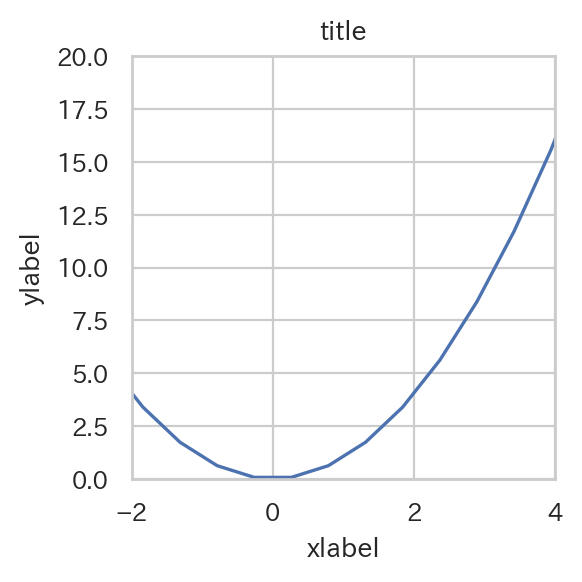

In [2]:
xx = np.linspace(-5,5,20)
yy = xx*xx

fig = plt.figure(figsize=(3,3),dpi=200)
ax  = fig.add_subplot(111)
ax.set_xlabel("xlabel")
ax.set_ylabel("ylabel")
ax.set_xlim([-2,4])
ax.set_ylim([0,20])

ax.plot(xx,yy)

plt.title("title")
plt.tight_layout()
plt.savefig("./test.png")
plt.show()

# Let's use context manager 

In [3]:
class BasicPlot():
    def __init__(self, xlim=None, ylim=None, xlabel="", ylabel="",title="",
            save_path=None, figsize=(5,3), dpi=150):
        self.fig = plt.figure(figsize=figsize,dpi=dpi)
        self.ax = self.fig.add_subplot(111)
        self.ax.set_xlabel(xlabel)
        self.ax.set_ylabel(ylabel)
        self.ax.set_xlim(xlim) if xlim else None
        self.ax.set_ylim(ylim) if ylim else None
        self.save_path = save_path
        self.title = title

    def __enter__(self):
        return(self)

    def __exit__(self,exc_type, exc_value, exc_traceback):
        self.option()
        plt.title(self.title)
        plt.tight_layout()
        if self.save_path:
            plt.savefig(self.save_path)
        plt.show()

    def option(self):
        '''This method is for additional graphic setting. 
        See DatePlot for example.'''
        pass

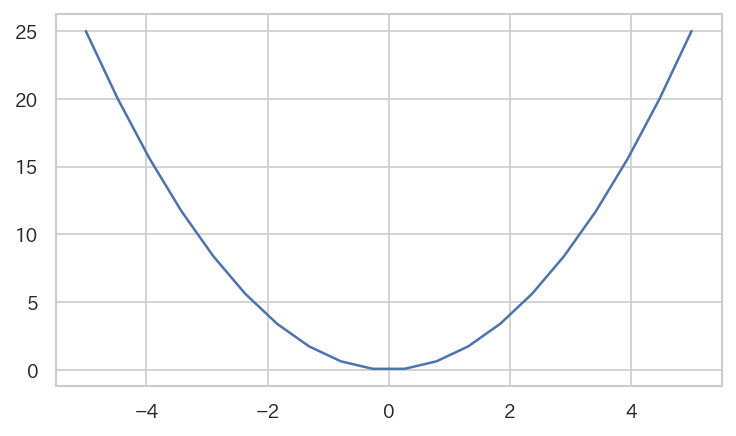

In [4]:
xx = np.linspace(-5,5,20)
yy = xx*xx

with BasicPlot() as p:
    p.ax.plot(xx,yy)

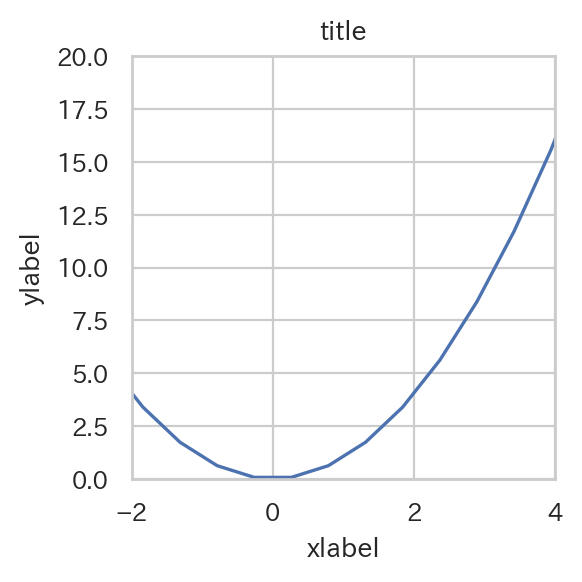

In [5]:
xx = np.linspace(-5,5,20)
yy = xx*xx

with BasicPlot(xlabel="xlabel",ylabel="ylabel",title="title",
               xlim=[-2,4],ylim=[0,20], figsize=(3,3),dpi=200,save_path="./test.png") as p:
    p.ax.plot(xx,yy)

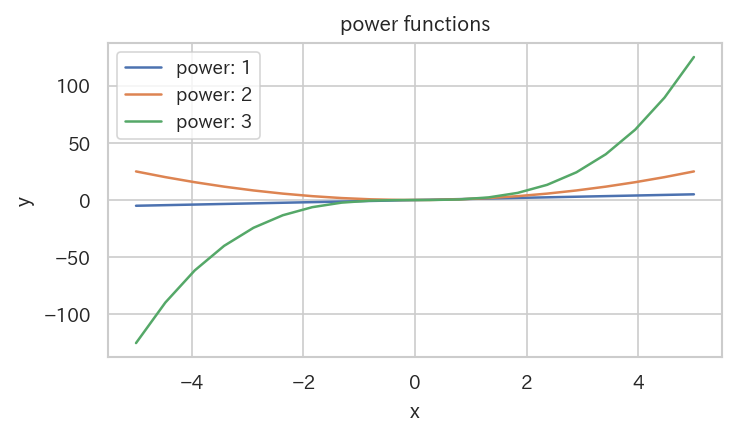

In [6]:
xx = np.linspace(-5,5,20)
y1 = xx**1
y2 = xx**2
y3 = xx**3
with BasicPlot(xlabel="x",ylabel="y",title="power functions",save_path="./power_func.png") as p:
    p.ax.plot(xx,y1,label="power: 1")
    p.ax.plot(xx,y2,label="power: 2")
    p.ax.plot(xx,y3,label="power: 3")
    plt.legend()

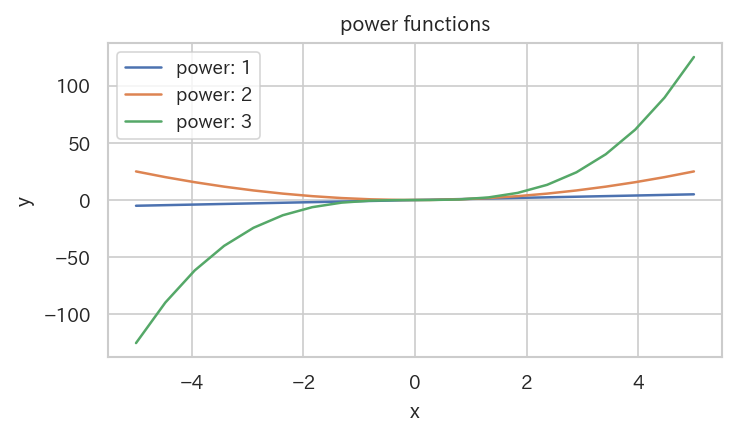

In [7]:
class PowerPlot(BasicPlot):
    def power_plot(self,xx,powers):
        for power in powers:
            y = np.power(xx,power)
            self.ax.plot(xx,y,label=f"power: {power}")
        plt.legend()
        
xx = np.linspace(-5,5,20)
with PowerPlot(xlabel="x",ylabel="y",title="power functions",save_path="./power_func.png") as p:
    p.power_plot(xx,[1,2,3])
    plt.legend()

# with keyword arguments

In [8]:
def wrap_plot(power,**kargs):
    xx = np.linspace(-5,5,20)
    yy = np.power(xx,power)
    with BasicPlot(**kargs) as p:
        p.ax.plot(xx,yy)

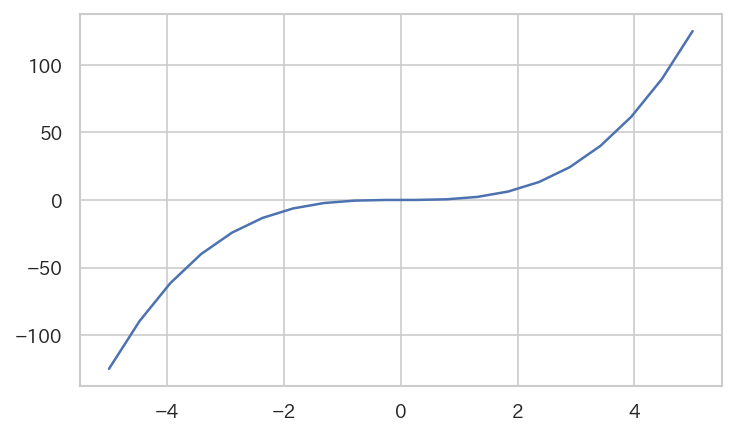

In [9]:
wrap_plot(3)

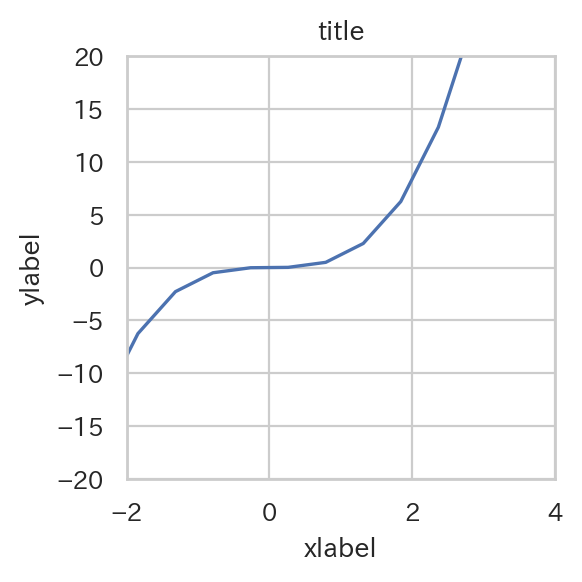

In [10]:
dic_ = dict(xlabel="xlabel",ylabel="ylabel",title="title",
            xlim=[-2,4],ylim=[-20,20], figsize=(3,3),dpi=200,save_path="./kargs.png")
wrap_plot(3,**dic_)

# xaxis is date

In [11]:
import matplotlib.dates as mdates

class DatePlot(BasicPlot):        
    def __init__(self,rotation=90,x_fontsize=10,**kargs):
        super().__init__(**kargs)
        self.rotation = rotation
        self.x_fontsize = x_fontsize

    def option(self):
        self.ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=1, tz=None))
        self.ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
        plt.xticks(rotation=self.rotation,fontsize=self.x_fontsize)


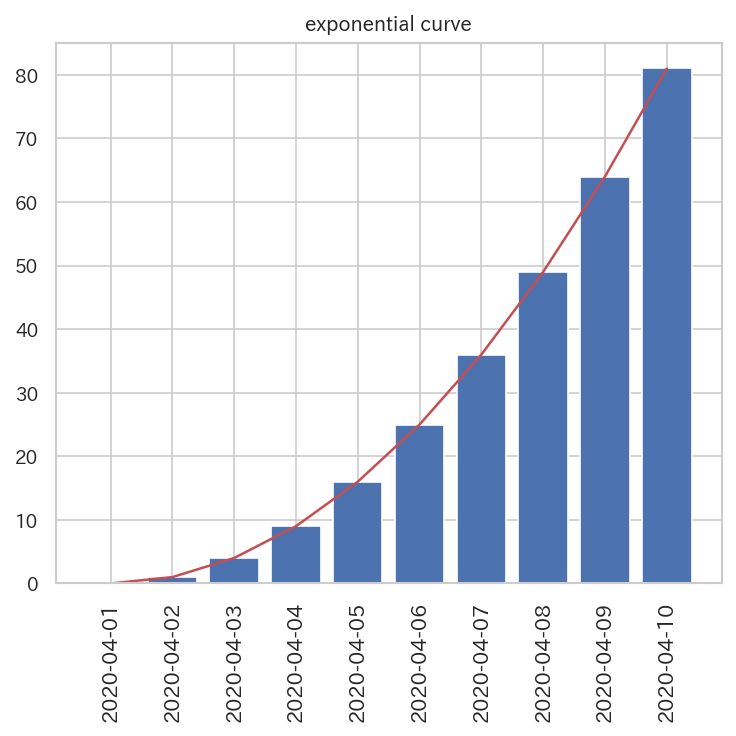

In [12]:
xx = [np.datetime64("2020-04-01")+np.timedelta64(i,"D") for i in range(10)]
yy = [i*i for i in range(10)]

with DatePlot(title="exponential curve",figsize=(5,5),save_path="./date.png") as p:
    p.ax.plot(xx,yy,color="r")
    p.ax.bar(xx,yy)